# CSE 251B Programming assignment

## Logistic Regression

### Evaluate the model on Convertible vs Minivan using the resized dataset

Car types: ['Convertible', 'Minivan'] 

Convertible: 150 # of images
Minivan: 150 # of images


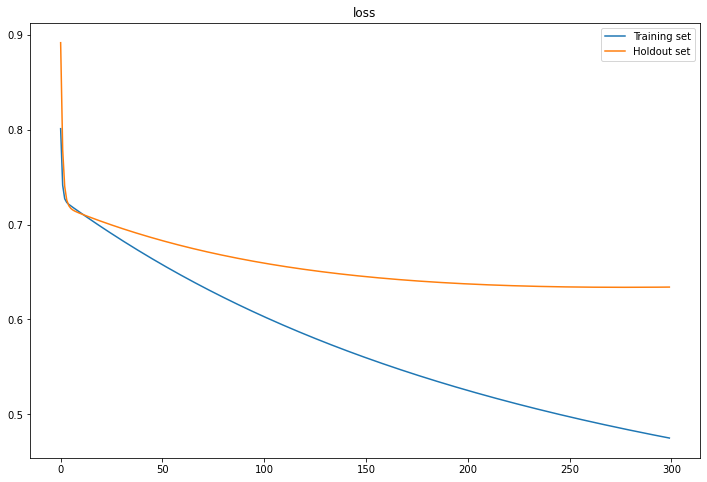

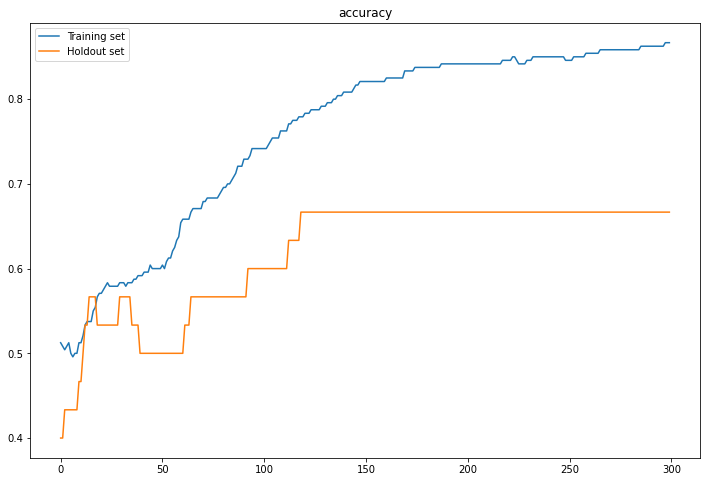

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataloader import load_data
from cross_validation import CrossValidationDataset
from pca import PCA
from logistic_regression import LogisticRegression
from utils import accuracy_01, plot

plt.rcParams["figure.figsize"] = (12, 8)


dataset = CrossValidationDataset(load_data('./resized/')[0])

train_loss_record = []
train_accuracy_record = []

holdout_loss_record = []
holdout_accuracy_record = []

for k, (train_datas, train_labels, test_datas, test_labels, holdout_datas, holdout_labels) in enumerate(dataset.data()):
    n_components = 99

    pca = PCA(train_datas, n_components)

    train_datas = pca.apply(train_datas)
    test_datas = pca.apply(test_datas)
    holdout_datas = pca.apply(holdout_datas)

    logistic = LogisticRegression(n_components)

    train_loss_record.append([])
    train_accuracy_record.append([])

    holdout_loss_record.append([])
    holdout_accuracy_record.append([])

    for epoch in range(300):
        train_y = logistic.forward(train_datas)
        train_loss = logistic.loss(train_y, train_labels)
        train_accuracy = accuracy_01(train_y, train_labels)
        train_loss_record[k].append(train_loss)
        train_accuracy_record[k].append(train_accuracy)

        holdout_y = logistic.forward(holdout_datas)
        holdout_loss = logistic.loss(holdout_y, holdout_labels)
        holdout_accuracy = accuracy_01(holdout_y, holdout_labels)
        holdout_loss_record[k].append(holdout_loss)
        holdout_accuracy_record[k].append(holdout_accuracy)

        logistic.backward(train_datas, train_y, train_labels)
    
    break

plot('loss', train_loss_record[0], holdout_loss_record[0])
plot('accuracy', train_accuracy_record[0], holdout_accuracy_record[0])